In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = 200
#note: delet: del X_test['fare']

In [2]:
path = 'https://classes.cs.uoregon.edu/18F/cis199ids/data/'
file = path + 'titanic_all.csv'
ship = pd.read_csv(file)
ship.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [4]:
ship.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
ship.shape

(1309, 14)

In [6]:
ship.pivot_table(index=['pclass', 'sex'], values=['survived'], aggfunc=np.sum)

survived
pclass sex             
1      female       139
       male          61
2      female        94
       male          25
3      female       106
       male          75

Split into X features and y targets

Drop survived column

In [7]:
X_ship = ship.drop('survived', axis=1)
X_ship.shape

(1309, 13)

use survived column as target

In [8]:
y_ship = ship['survived']
y_ship.shape

(1309,)

Split again into 4 parts
X train and test, y train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_ship, y_ship, test_size=0.30, random_state=199)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 13), (393, 13), (916,), (393,))

Look only at X_train data, never look at X_test data

In [11]:
X_train.sample(n=10, random_state=77)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1264,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,NaN,255.0,NaN
293,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S,5 7,NaN,"London / East Orange, NJ"
652,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S,NaN,NaN,"Krakoryd, Sweden Bloomington, IL"
924,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
262,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S,NaN,NaN,"Duluth, MN"
231,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,6,NaN,"Toronto, ON"
182,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C,2,NaN,NaN
1117,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S,NaN,NaN,NaN
441,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,13,NaN,"India / Rapid City, SD"
1018,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S,NaN,NaN,NaN


In [12]:
X_train.describe()

,pclass,age,sibsp,parch,fare,body
count,916.000000,720.000000,916.000000,916.000000,915.000000,84.000000
mean,2.300218,30.250347,0.480349,0.382096,33.568173,151.988095
std,0.830064,14.462495,0.993226,0.888461,55.399616,98.138640
min,1.000000,0.170000,0.000000,0.000000,0.000000,4.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,67.750000
50%,3.000000,28.000000,0.000000,0.000000,14.108300,138.500000
75%,3.000000,39.000000,1.000000,0.000000,30.035400,255.750000
max,3.000000,76.000000,8.000000,9.000000,512.329200,328.000000


In [13]:
y_train.describe()

count    916.000000
mean       0.366812
std        0.482198
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

Remove name, boat, body

In [14]:
X_train = X_train.copy()
X_train['cabin'] = X_train['cabin'].notnull()
X_test = X_test.copy()
X_test['cabin'] = X_test['cabin'].notnull()

X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
260,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,True,S,3,NaN,"New York, NY / Greenwich CT"
1096,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,False,S,NaN,4.0,NaN
585,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,False,S,NaN,293.0,"Bromsgrove, England / Montreal, PQ"
204,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,False,C,6,NaN,"New York, NY"
498,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,False,S,NaN,209.0,"Sydney, Australia"


In [15]:
X_train['embarked'] = X_train['embarked'].fillna('S')
X_train['sex'].replace(('male', 'female'), (0, 1), inplace=True)
X_train['age'] = X_train['age'].fillna(X_train['age'].median())
X_train['fare'] = X_train['fare'].fillna(X_train['fare'].median())
X_test['embarked'] = X_test['embarked'].fillna('S')
X_test['sex'].replace(('male', 'female'), (0, 1), inplace=True)
X_test['age'] = X_test['age'].fillna(X_test['age'].median())
X_test['fare'] = X_test['fare'].fillna(X_test['fare'].median())

X_train.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
260,1,"Shutes, Miss. Elizabeth W",1,40.0,0,0,PC 17582,153.4625,True,S,3,NaN,"New York, NY / Greenwich CT"
1096,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,False,S,NaN,4.0,NaN
585,2,"Weisz, Mr. Leopold",0,27.0,1,0,228414,26.0000,False,S,NaN,293.0,"Bromsgrove, England / Montreal, PQ"
204,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",1,28.0,1,0,PC 17604,82.1708,False,C,6,NaN,"New York, NY"
498,2,"McCrae, Mr. Arthur Gordon",0,32.0,0,0,237216,13.5000,False,S,NaN,209.0,"Sydney, Australia"


In [16]:
#X_train = pd.get_dummies(X_train, columns=['embarked'])
#X_test = pd.get_dummies(X_test, columns=['embarked'])
#X_train.sample(n=15, random_state=199)

In [17]:
def get_title(name):
    
    excluded = ['Mr.', 'Mrs.']
    title_list = ['Master.', 'Miss.', 'Ms.', 'Dona.', 'Mme.', 'Mile.', 'Duchess.', 'Countess.', 'Baroness', 'Lady.']
    
    #Excluded?
    for title in excluded:
        if title in name:
            return 0
    
    #Titled?
    for title in title_list:
        if title in name:
            return 1
    
    #no title or unexpected title?
    print('NO ', name)
    return 0

#creating a new column by using the 'name' coulumn and applying our get_title function to it
X_train['titled'] = X_train['name'].apply(get_title)
X_test['titled'] = X_test['name'].apply(get_title)

NO  Peuchen, Major. Arthur Godfrey
NO  Reuchlin, Jonkheer. John George
NO  Brewe, Dr. Arthur Jackson
NO  Kirkland, Rev. Charles Leonard
NO  Butt, Major. Archibald Willingham
NO  Montvila, Rev. Juozas
NO  Moraweck, Dr. Ernest
NO  Frauenthal, Dr. Henry William
NO  Byles, Rev. Thomas Roussel Davids
NO  Carter, Rev. Ernest Courtenay
NO  Gracie, Col. Archibald IV
NO  Pain, Dr. Alfred
NO  Stahelin-Maeglin, Dr. Max
NO  Lahtinen, Rev. William
NO  Crosby, Capt. Edward Gifford
NO  Dodge, Dr. Washington
NO  Astor, Col. John Jacob
NO  Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
NO  Minahan, Dr. William Edward
NO  Bateman, Rev. Robert James
NO  Peruschitz, Rev. Joseph Maria
NO  Harper, Rev. John
NO  Simonius-Blumer, Col. Oberst Alfons
NO  Leader, Dr. Alice (Farnham)
NO  Sagesser, Mlle. Emma
NO  Uruchurtu, Don. Manuel E
NO  Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
NO  Weir, Col. John


In [18]:
X_train = X_train.copy()
X_train = X_train.drop(['name', 'sibsp', 'parch', 'cabin', 'fare', 'boat', 'body', 'ticket', 'home.dest', 'embarked'], axis=1)
X_test = X_test.copy()
X_test = X_test.drop(['name', 'sibsp', 'parch', 'cabin', 'fare', 'boat', 'body', 'ticket', 'home.dest', 'embarked'], axis=1)

X_train.head()

,pclass,sex,age,titled
260,1,1,40.0,1
1096,3,0,2.0,1
585,2,0,27.0,0
204,1,1,28.0,0
498,2,0,32.0,0


1. Choose the class of model to use

In [19]:
from sklearn.naive_bayes import GaussianNB

2. Create the model

In [20]:
model = GaussianNB( )

3. Fit model to training data to train model

Model will learn by example

In [21]:
model.fit(X_train, y_train)

GaussianNB(priors=None)

4. Run model with test features to predict test target

In [22]:
y_predictions = model.predict(X_test)
y_predictions.shape

(393,)

5. Check model accuracy

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7811704834605598

75% !! Bless up!

In [24]:
my_columns = ['pcalss', 'sex', 'age', 'titled']

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
#DecisionTreeClassifier?

In [27]:
model = DecisionTreeClassifier(max_leaf_nodes=8,
                               max_depth=4,
                               min_samples_leaf=20,
                               criterion='gini',
                               splitter='random',
                               random_state=199)

model.fit(X_train, y_train);

y_predictions = model.predict(X_test)

accuracy_score(y_test, y_predictions)

0.7455470737913485

In [28]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model,
                           out_file='titanic.dot',
                           feature_names=my_columns,
                           class_names=['dies', 'survives'],
                           rounded=True,
                           filled=True)

In [29]:
!dot -Tjpg titanic.dot -o my-titanic-decision-tree14-6-4.jpg

'dot' is not recognized as an internal or external command,
operable program or batch file.


Text(92.68,0.5,'predicted label')

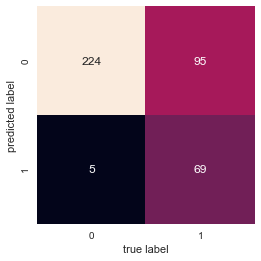

In [30]:
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predictions)
#mat.T creates the transpose of the matrix mat
#fmt='d' format for (int) 'digits'
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')